In [29]:
#Task 2(Level 3) Support Vector Machine 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
data = pd.read_csv("Churn Prdiction Data/churn.csv")

In [32]:
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


In [33]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [34]:
data.drop(['State', 'Area code'], axis=1, inplace=True)


In [35]:
label_enc = LabelEncoder()
data['International plan'] = label_enc.fit_transform(data['International plan'])
data['Voice mail plan'] = label_enc.fit_transform(data['Voice mail plan'])


In [36]:
data['Churn'] = data['Churn'].astype(int)  # Converts True/False to 1/0

In [37]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
x_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [40]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [41]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy (Linear Kernel): {accuracy:.2f}")


SVM Accuracy (Linear Kernel): 0.86


In [59]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(x_train, y_train)


SVC(probability=True)

In [62]:
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_model.fit(x_train, y_train)


SVC(class_weight='balanced', probability=True)

In [64]:
y_pred = svm_model.predict(X_test)

In [65]:
print("SVM Accuracy (RBF, balanced):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy (RBF, balanced): 0.900497512437811
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       173
           1       0.60      0.86      0.71        28

    accuracy                           0.90       201
   macro avg       0.79      0.88      0.82       201
weighted avg       0.92      0.90      0.91       201



In [61]:
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM Accuracy (RBF Kernel): {accuracy_rbf:.2f}")


SVM Accuracy (RBF Kernel): 0.90


In [44]:
print(f"Linear Kernel Accuracy: {accuracy:.2f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")


Linear Kernel Accuracy: 0.86
RBF Kernel Accuracy: 0.90


In [45]:
# Decision Boundary
import numpy as np
from sklearn.decomposition import PCA


In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [47]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [48]:
svm_rbf_2d = SVC(kernel='rbf')
svm_rbf_2d.fit(X_train_pca, y_train_pca)


SVC()

In [49]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

In [50]:
Z = svm_rbf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

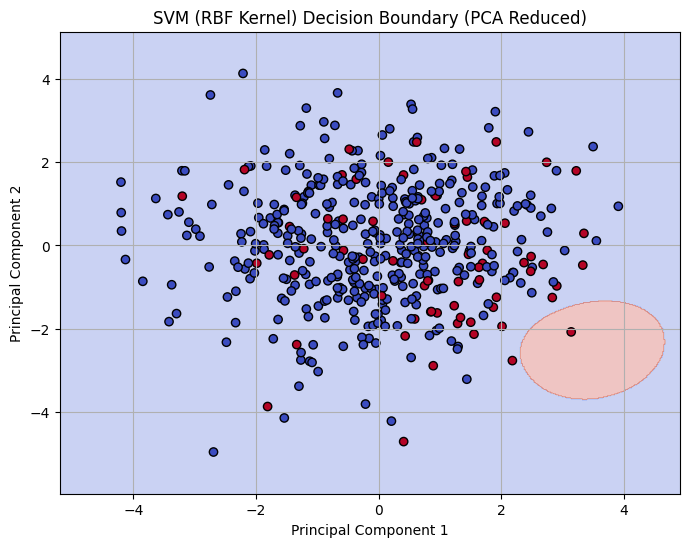

In [51]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM (RBF Kernel) Decision Boundary (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [52]:
#Evaluate the model using accuracy, precision, recall,and AUC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [66]:
y_pred = svm_model.predict(X_test)

In [67]:
y_proba = svm_model.predict_proba(X_test)[:, 1]


In [68]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       173
           1       0.60      0.86      0.71        28

    accuracy                           0.90       201
   macro avg       0.79      0.88      0.82       201
weighted avg       0.92      0.90      0.91       201



In [69]:
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.2f}")

AUC: 0.93


In [70]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


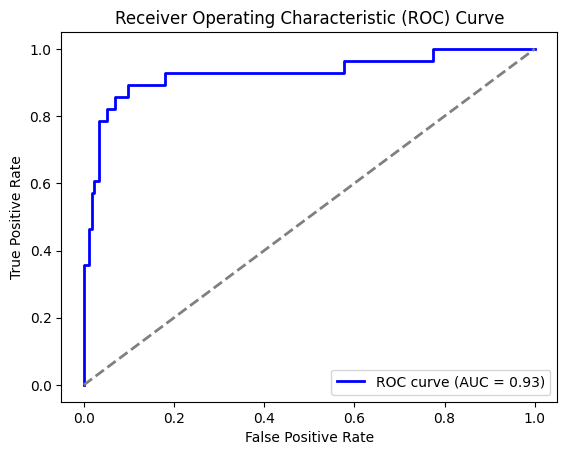

In [71]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [80]:
# Choose a threshold value (e.g., 0.3, 0.7)
threshold = 0.5
y_pred_adjusted = (y_proba >= threshold).astype(int)


In [81]:
# Print the new classification report with the adjusted threshold
print(f"Classification Report (Threshold = {threshold}):\n", classification_report(y_test, y_pred_adjusted))


Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       173
           1       0.77      0.61      0.68        28

    accuracy                           0.92       201
   macro avg       0.86      0.79      0.82       201
weighted avg       0.92      0.92      0.92       201

